In [4]:
import pandas as pd

game = pd.read_csv('games.csv')

In [5]:
game.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [6]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [8]:
game.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [17]:
game = game.drop(['id'], axis=1)  

In [29]:
game = game.drop(['increment_code'], axis=1)  

In [37]:
game = game.drop(['white_id', 'black_id', 'moves', 'opening_eco', 'opening_name'], axis=1)  

In [38]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   white_rating    20058 non-null  int64  
 7   black_rating    20058 non-null  int64  
 8   opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 1.2+ MB


In [39]:
game['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [40]:
onehot_victory_status = pd.get_dummies(game['victory_status'])

In [87]:
onehot_winner = pd.get_dummies(game['winner'])

In [88]:
game = pd.concat([game, onehot_victory_status], axis=1)

In [90]:
game = pd.concat([game, onehot_winner], axis=1)

In [46]:
game = game.drop(['victory_status'], axis=1)  

In [91]:
game = game.drop(['winner'], axis=1)  

In [92]:
game

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,draw,mate,outoftime,resign,draw,mate,outoftime,resign,black,draw,white
0,False,1.504210e+12,1.504210e+12,13,1500,1191,5,0,0,1,0,0,0,1,0,0,0,1
1,True,1.504130e+12,1.504130e+12,16,1322,1261,4,0,0,0,1,0,0,0,1,1,0,0
2,True,1.504130e+12,1.504130e+12,61,1496,1500,3,0,1,0,0,0,1,0,0,0,0,1
3,True,1.504110e+12,1.504110e+12,61,1439,1454,3,0,1,0,0,0,1,0,0,0,0,1
4,True,1.504030e+12,1.504030e+12,95,1523,1469,5,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,1.499791e+12,1.499791e+12,24,1691,1220,2,0,0,0,1,0,0,0,1,0,0,1
20054,True,1.499698e+12,1.499699e+12,82,1233,1196,2,0,1,0,0,0,1,0,0,1,0,0
20055,True,1.499698e+12,1.499698e+12,35,1219,1286,3,0,1,0,0,0,1,0,0,0,0,1
20056,True,1.499696e+12,1.499697e+12,109,1360,1227,4,0,0,0,1,0,0,0,1,0,0,1


In [93]:
y = game["white"]
X = game.drop(["white", "black"], axis = 1)

In [94]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [95]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=20)

In [97]:
knn = KNeighborsClassifier(n_neighbors=10)

In [98]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [99]:
y_hat = knn.predict(X_test)

In [100]:
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

              precision    recall  f1-score   support

           0       0.62      0.70      0.66      2023
           1       0.65      0.57      0.61      1989

    accuracy                           0.64      4012
   macro avg       0.64      0.64      0.63      4012
weighted avg       0.64      0.64      0.63      4012



In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [112]:
model = Sequential()
model.add(Dense(256, input_shape=(16,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               4352      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)                4112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 16)               

In [113]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
502/502 [==============================] - 2s 3ms/step - loss: 0.6155 - accuracy: 0.6322 - val_loss: 0.5931 - val_accuracy: 0.6595
Epoch 2/30
502/502 [==============================] - 1s 2ms/step - loss: 0.5949 - accuracy: 0.6597 - val_loss: 0.5923 - val_accuracy: 0.6610
Epoch 3/30
502/502 [==============================] - 1s 3ms/step - loss: 0.5881 - accuracy: 0.6663 - val_loss: 0.5878 - val_accuracy: 0.6650
Epoch 4/30
502/502 [==============================] - 1s 3ms/step - loss: 0.5861 - accuracy: 0.6661 - val_loss: 0.5903 - val_accuracy: 0.6623
Epoch 5/30
502/502 [==============================] - 1s 3ms/step - loss: 0.5852 - accuracy: 0.6653 - val_loss: 0.5892 - val_accuracy: 0.6670
Epoch 6/30
502/502 [==============================] - 1s 3ms/step - loss: 0.5836 - accuracy: 0.6704 - val_loss: 0.5923 - val_accuracy: 0.6650
Epoch 7/30
502/502 [==============================] - 1s 3ms/step - loss: 0.5832 - accuracy: 0.6666 - val_loss: 0.5934 - val_accuracy: 0.6618
Epoch 

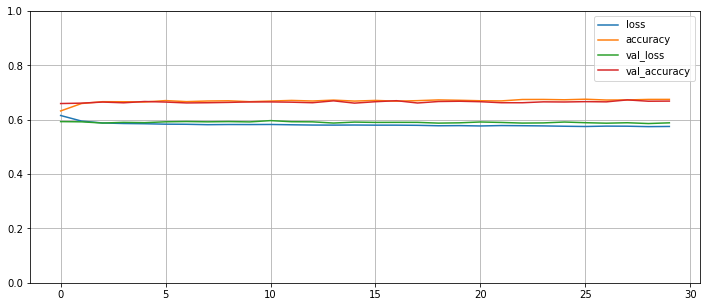

In [114]:
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()